
### Data Cleaning Summary

This section performs the following operations to clean and preprocess the dataset:

1. **Load Data**: Reads the dataset from a CSV file.
2. **Initial Overview**: Displays the shape and first few rows.
3. **Data Cleaning**:
   - Removes duplicate rows.
   - Drops columns with over 30% missing values.
   - Fills remaining missing values with the median.
4. **Feature Selection**: Ensures at least 30 relevant features are retained.
5. **Sample Count Check**: Ensures at least 10,000 samples are available post-cleaning.
6. **Final Overview**: Displays the final dataset shape and first few rows.

This ensures a clean and structured dataset ready for further analysis.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the dataset (adjust path as needed)
#df = pd.read_csv('/Users/nakuljoshi/Downloads/covtype.csv')
df = pd.read_csv('covtype.csv')

# Display basic info to understand the dataset
print("Initial dataset shape:", df.shape)
display(df.head())

def clean_data(df):
    # Remove duplicate rows
    df = df.drop_duplicates()
    
    # Drop columns with more than 30% missing values
    threshold = 0.3 * len(df)
    df = df.dropna(thresh=threshold, axis=1)
    
    # Fill remaining missing values with median
    df = df.fillna(df.median(numeric_only=True))
    
    # Remove irrelevant or non-informative features (adjust as needed)
    if 'ID' in df.columns:
        df = df.drop(columns=['ID'])
    
    return df

# Clean the dataset
df_cleaned = clean_data(df)

# Display final shape
print("Final dataset shape:", df_cleaned.shape)
display(df_cleaned.head())


Initial dataset shape: (581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


Final dataset shape: (581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


### Understanding the structure of the dataset

This section performs the following operations:

1. **Standardize raw features**: Chapters 3 (3.3) and 13 (13.3.1) for reference. To do this, we first identify the mean and standard deviation of each feature.
2. **Perform k-means clustering**: Chapter 4 for reference. We test different values of k to identify the best k we could find.
3. **Perform Singular Value Decomposition (SVD) on the standardized dataset**: We identify the features with the highest singular values. This [webpage](https://towardsdatascience.com/understanding-singular-value-decomposition-and-its-application-in-data-science-388a54be95d) for reference.
4. **Construct the correlation matrix/table for feature vectors**: We identify highly correlated features. For reference, if A is the correlation matrix, then Ai,j is the correlation coefficient (Chapter 3.4) between the columns i and j of the original (standardized) dataset. 


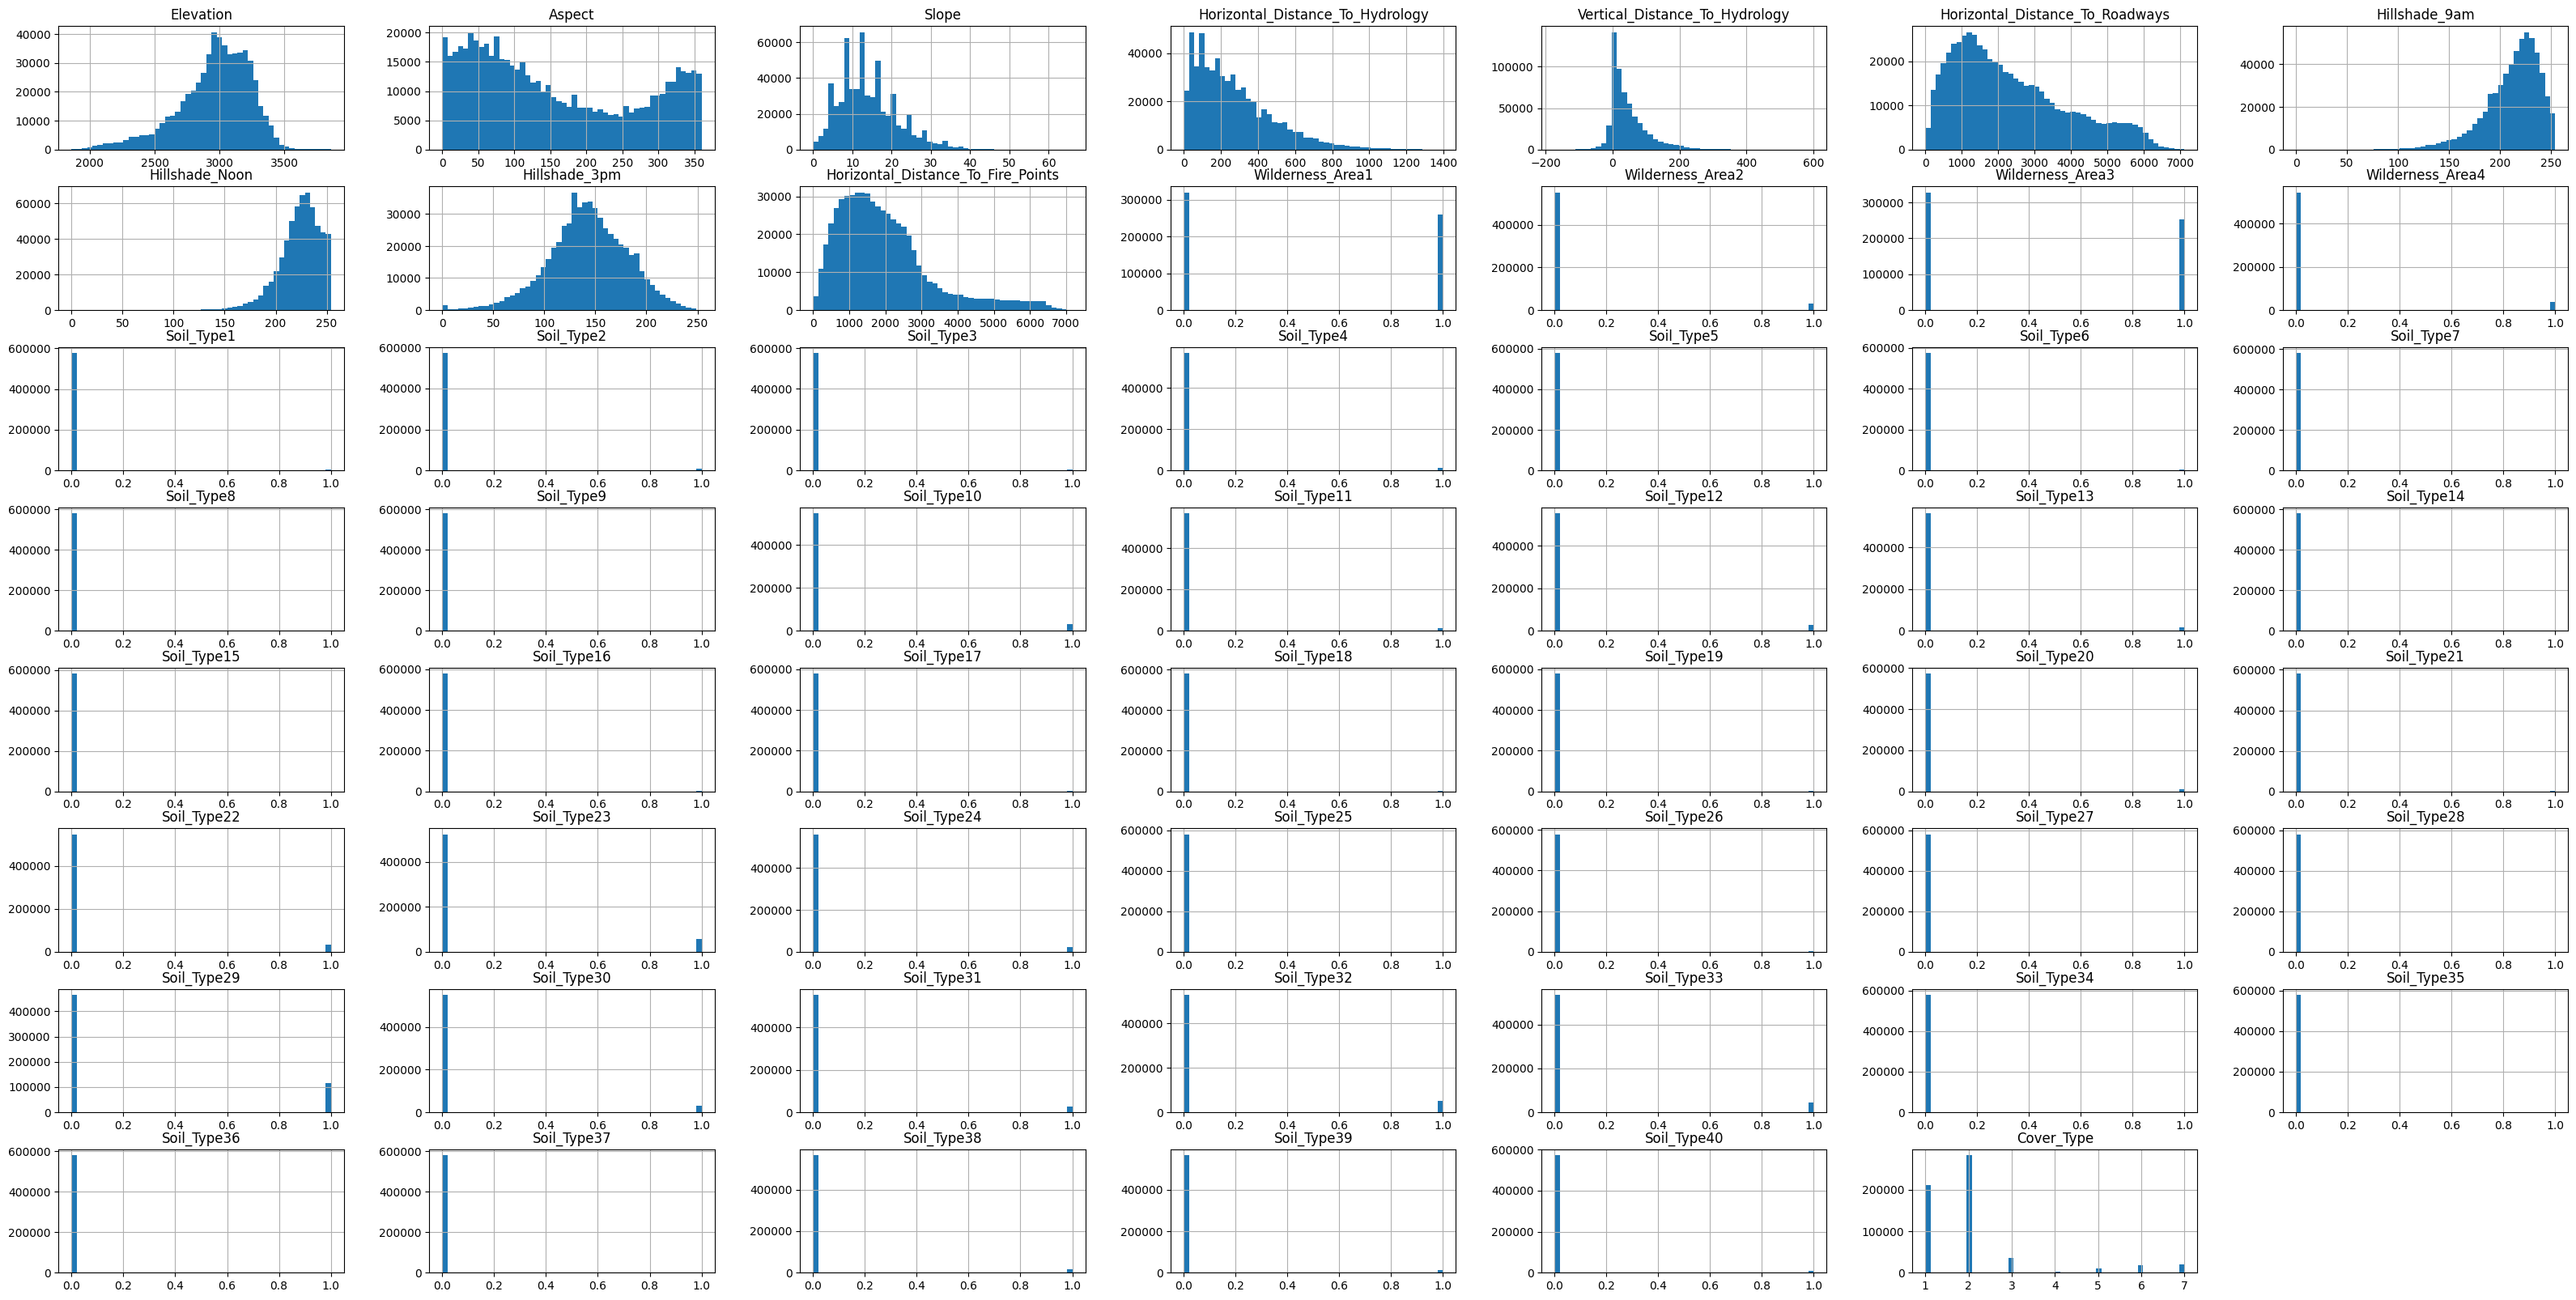

In [4]:
# First, observe the distribution of data
df_cleaned.hist(bins=50, figsize=(40,20))
plt.show()

In [5]:
# Check all features are numerical
df_cleaned.dtypes.value_counts()

int64    55
Name: count, dtype: int64

In [6]:
# Standardize features
df_std = df_cleaned.copy(deep=True)

# From the histogram above, we see that we need to standardize:
gradient_features =['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']

# We need to add new columns to convert the following into a set of binary ones (13.3.2):
categoric_features = ['Cover_Type']

# We can leave the following as is since they are Boolean (13.3.2):
binary_features = ['Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40']

In [7]:
# Standardize gradient features. Report on means and standard deviations
fmt = '{: >36} {: >24} {: >24} {: >24} {: >24}'
print(fmt.format(*['GRADIENT FEATURE', 'ORGINAL MEAN', 'ORGINAL STD', 'NEW MEAN', 'NEW STD']), '\n')

for ft in gradient_features:
    old_mean, old_std = df_cleaned[ft].mean(), df_cleaned[ft].std()

    # 3.3: The standardized version of a vector is the according demeaned vector divided by the std, i.e. z-scores.
    df_std[ft] = (df_cleaned[ft].sub(old_mean)).div(old_std)

    new_mean, new_std = df_std[ft].mean(), df_std[ft].std()

    print(fmt.format(*[ft, old_mean, old_std, new_mean, new_std]))

print('\nSee that the gradient features have been standardized since the new means are ~0 and the new stds ~1.')

                    GRADIENT FEATURE             ORGINAL MEAN              ORGINAL STD                 NEW MEAN                  NEW STD 

                           Elevation        2959.365300544567       279.98473425063816  -3.4437986545896505e-16                      1.0
                              Aspect       155.65680743254873       111.91372100329545   -5.909245418670878e-17                      1.0
                               Slope       14.103703537964792        7.488241814480137    7.357206216623345e-17       0.9999999999999999
    Horizontal_Distance_To_Hydrology       269.42821662891646       212.54935559508107  -1.1192345627416364e-16       0.9999999999999999
      Vertical_Distance_To_Hydrology       46.418855376481034       58.295231626887244    3.345963465538808e-17       0.9999999999999999
     Horizontal_Distance_To_Roadways       2350.1466114297123       1559.2548698976088    2.034971932257521e-17       0.9999999999999999
                       Hillshade_9am   

In [8]:
# Standardize categorical features.
for ft in categoric_features:
    # Can verify that the feature is categoric first
    print(df_cleaned[ft].value_counts(), '\n')

    # Add and fill columns 
    ft_min, ft_max = df_cleaned[ft].min().astype(object), df_cleaned[ft].max().astype(object)
    for i in range(ft_min, ft_max + 1):
        ft_type_i = ft + '_' + str(i)
        df_std[ft_type_i] = df_std.apply(lambda sample: 1 if sample[ft] == i else 0, axis=1)

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64 



In [9]:
# Confirmation that the conversion was done correctly
cover_types = ['Cover_Type', 'Cover_Type_1', 'Cover_Type_2', 'Cover_Type_3', 'Cover_Type_4', 'Cover_Type_5', 'Cover_Type_6', 'Cover_Type_7']
df_std[cover_types].head()

,Cover_Type,Cover_Type_1,Cover_Type_2,Cover_Type_3,Cover_Type_4,Cover_Type_5,Cover_Type_6,Cover_Type_7
0,5,0,0,0,0,1,0,0
1,5,0,0,0,0,1,0,0
2,2,0,1,0,0,0,0,0
3,2,0,1,0,0,0,0,0
4,5,0,0,0,0,1,0,0


In [10]:
# Finally, drop original categorical columns
for ft in categoric_features:
    df_std = df_std.drop(ft, axis=1)
df_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 61 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area1                    581012 non-null  int64  
 11  Wilderness_Area2          

In [11]:
# Final statistics report
print(fmt.format(*['FEATURE', 'MIN', 'MAX', 'MEAN', 'STD']), '\n')
for ft, val in df_std.items():
    min, max, mean, std = df_std[ft].min(), df_std[ft].max(), df_std[ft].mean(), df_std[ft].std()
    print(fmt.format(*[ft, min, max, mean, std]))

                             FEATURE                      MIN                      MAX                     MEAN                      STD 

                           Elevation      -3.9300903439954573        3.209584629178348  -3.4437986545896505e-16                      1.0
                              Aspect       -1.390864373350299       1.8258993690454999   -5.909245418670878e-17                      1.0
                               Slope      -1.8834465936573024       6.9303713405304945    7.357206216623345e-17       0.9999999999999999
    Horizontal_Distance_To_Hydrology      -1.2676030744698796        5.304988011909919  -1.1192345627416364e-16       0.9999999999999999
      Vertical_Distance_To_Hydrology      -3.7639245827317285        9.513319171164113    3.345963465538808e-17       0.9999999999999999
     Horizontal_Distance_To_Roadways      -1.5072241599502194        3.057135482208442    2.034971932257521e-17       0.9999999999999999
                       Hillshade_9am   

#### Perform k-means clustering

Can avoid running this section when working on other sections since these cells take quite a bit of time to identify the optimal k.

add to report maybe: some preliminary observations

- the issue of categorical variables in k-means clustering

- imbalanced cover_type count -> difficult to identify accurate clusters of cover types that weren't frequent in the first place (see histograms)

In [12]:
df_labels = gradient_features
df_arr = df_std[gradient_features].to_numpy() # df_std.to_numpy()
    # Probably do not really want to perform k-means on categorical/binary features.
    # Our clustering probably won't be very accurate then since we're completely ignoring soil_type.
sample_count = df_arr.shape[0]
sample_size = df_arr.shape[1]

def kmeans(N):
    # Randomly initialize a table of integers between [0, N] for each cluster
    group = np.random.randint(0, N, size=sample_count) # group[i] == group of i-th sample

    # Initialization
    representative = [np.zeros(sample_size) for _ in range(N)]
    iter = 0
    J_prev = 0
    threshold_factor = 10E-5

    J_iter = []
    while True:
        # Update representatives to be the centroid of the samples assigned to it
        for group_index in range(N):
            group_data = df_arr[group == group_index, : ]
            representative[group_index] = group_data.mean(axis=0)

        # For each representative, find Euclidean distances to each sample
        euc_dist = []
        for rep in representative:
            euc_dist.append(np.sum((df_arr - rep) ** 2, axis=1)) 

        # Transpose so that we have for each image its distance to each representative
        euc_dist = np.array(euc_dist).transpose()

        # For each image, find the closest representative and reassign image to that
        group = np.argmin(euc_dist, axis=1)

        # Check if need to iterate again, i.e. has sum of deltas changed minimally?
        J = np.sum(np.min(euc_dist, axis=1)) / sample_count
        if J == np.nan:
            break
        J_iter.append([iter, J])
        if iter > 75:
            break
        if abs(J - J_prev) <= threshold_factor * J:
            break
        J_prev = J
        iter = iter + 1

    return group, J_iter

In [13]:
cover_types = ['Cover_Type_1', 'Cover_Type_2', 'Cover_Type_3', 'Cover_Type_4', 'Cover_Type_5', 'Cover_Type_6', 'Cover_Type_7']
N = 20 
results = []
for i in range(N):
    cluster_assignments, J_iter = kmeans(i + 7)
    results.append([i + 7, cluster_assignments, J_iter])

/var/folders/7g/9zj5dly54_q8tglc5gnzv68m0000gn/T/ipykernel_37694/2679476779.py:23: RuntimeWarning: Mean of empty slice.
  representative[group_index] = group_data.mean(axis=0)
/Users/nakuljoshi/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [14]:
for i in range(N):
    res = results[i][2][-1]
    print("k =", results[i][0], ": ", res[0], "iterations, final mean square distance of", res[1])

k = 7 :  20 iterations, final mean square distance of 5.056676854310858
k = 8 :  34 iterations, final mean square distance of 4.822379118287279
k = 9 :  40 iterations, final mean square distance of 4.648674311783911
k = 10 :  16 iterations, final mean square distance of 4.4811310434637575
k = 11 :  15 iterations, final mean square distance of 4.338902222491755
k = 12 :  20 iterations, final mean square distance of 4.228402248407617
k = 13 :  19 iterations, final mean square distance of 4.069782069490771
k = 14 :  19 iterations, final mean square distance of 3.994623191811284
k = 15 :  19 iterations, final mean square distance of 3.887022381362899
k = 16 :  76 iterations, final mean square distance of nan
k = 17 :  26 iterations, final mean square distance of 3.7015177110501334
k = 18 :  25 iterations, final mean square distance of 3.640992738393419
k = 19 :  39 iterations, final mean square distance of 3.5656059045487343
k = 20 :  76 iterations, final mean square distance of nan
k = 21

Cover_Type_1 6616
Cover_Type_2 7043
Cover_Type_3 46
Cover_Type_4 1
Cover_Type_5 170
Cover_Type_6 8
Cover_Type_7 2131

Cover_Type_1 7955
Cover_Type_2 16498
Cover_Type_3 0
Cover_Type_4 0
Cover_Type_5 48
Cover_Type_6 0
Cover_Type_7 1267

Cover_Type_1 5363
Cover_Type_2 10625
Cover_Type_3 0
Cover_Type_4 0
Cover_Type_5 0
Cover_Type_6 0
Cover_Type_7 99

Cover_Type_1 9981
Cover_Type_2 16089
Cover_Type_3 490
Cover_Type_4 2
Cover_Type_5 320
Cover_Type_6 1006
Cover_Type_7 274

Cover_Type_1 2520
Cover_Type_2 20017
Cover_Type_3 7067
Cover_Type_4 800
Cover_Type_5 1465
Cover_Type_6 3157
Cover_Type_7 0

Cover_Type_1 5021
Cover_Type_2 4450
Cover_Type_3 68
Cover_Type_4 1
Cover_Type_5 13
Cover_Type_6 0
Cover_Type_7 1398

Cover_Type_1 14844
Cover_Type_2 12338
Cover_Type_3 17
Cover_Type_4 0
Cover_Type_5 133
Cover_Type_6 476
Cover_Type_7 892

Cover_Type_1 487
Cover_Type_2 6173
Cover_Type_3 5679
Cover_Type_4 513
Cover_Type_5 273
Cover_Type_6 4675
Cover_Type_7 0

Cover_Type_1 19599
Cover_Type_2 15487
Cover_Ty

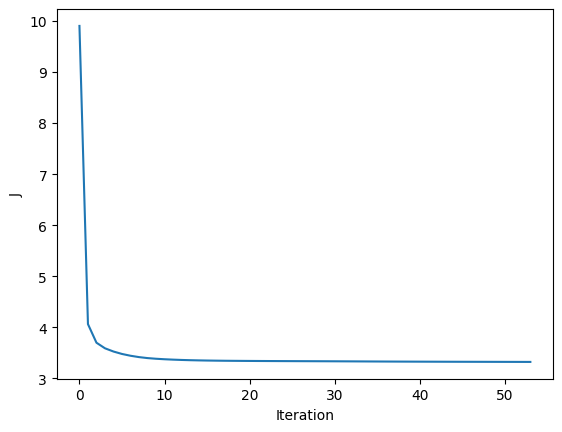

In [15]:
# See results of k-means algorithm for k=
k = 24
res_k = results[k - 7]
clusters = res_k[1]
J_iter = res_k[2]

for group_index in range(k):
    group_data = df_std.loc[np.where(clusters == group_index)]
    for cover in cover_types:
        print(cover, group_data[cover].sum())
    print()

xs=[]
ys=[]
for x,y in J_iter:
    xs.append(x)
    ys.append(y)

fig = plt.figure()
plt.xlabel('Iteration')
plt.ylabel('J')
plt.plot(xs,ys)
plt.show()    

#### Singular Value Decomposition

In [19]:
import numpy as np
import pandas as pd

# Remove last 7 rows (cover type labels)
df_std = df_std.iloc[:, :-7]

# Compute the covariance matrix
X = df_std.values  
X_meaned = X - np.mean(X, axis=0)
cov_matrix = np.cov(X_meaned, rowvar=False)

# Perform Singular Value Decomposition (SVD)
U, S, Vt = np.linalg.svd(cov_matrix)

# Feature names
feature_names = df_std.columns  # Assuming df_std is a standardized DataFrame with named columns

# Create labeled covariance matrix
cov_df = pd.DataFrame(cov_matrix, index=feature_names, columns=feature_names)

# Create labeled singular values table
singular_values_df = pd.DataFrame(S, index=[f"Singular Value {i+1}" for i in range(len(S))], columns=["Value"])

# Create labeled left singular vectors (U matrix)
U_df = pd.DataFrame(U, index=feature_names, columns=[f"Singular Vector {i+1}" for i in range(U.shape[1])])

# Create labeled right singular vectors (Vt matrix)
Vt_df = pd.DataFrame(Vt, index=[f"Singular Vector {i+1}" for i in range(Vt.shape[0])], columns=feature_names)

# Function to style and make scrollable
def make_scrollable(df, max_height="300px"):
    return df.style.set_sticky().set_properties(**{"max-height": max_height, "overflow": "auto"})

# Display matrices with scrollable format
print("Covariance Matrix:")
display(make_scrollable(cov_df))

print("\nSingular Values:")
display(make_scrollable(singular_values_df))

print("\nLeft Singular Vectors (U):")
display(make_scrollable(U_df))

print("\nRight Singular Vectors (Vt):")
display(make_scrollable(Vt_df))

# Find the most important features for each principal component
top_features_per_pc = {}
num_top_features = 5  # Adjust to see more/less features per component

for i in range(U.shape[1]):
    top_features = np.argsort(-np.abs(U[:, i]))[:num_top_features]
    top_features_per_pc[f"Principal Component {i+1}"] = feature_names[top_features].tolist()

# Convert to DataFrame
top_features_df = pd.DataFrame(top_features_per_pc)

print("\nMost Important Features Per Principal Component:")
display(make_scrollable(top_features_df))


Covariance Matrix:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,0.065573,0.052606,0.033002,-0.151181,-0.014733,-0.021220,-0.016555,-0.026519,-0.007873,-0.022700,-0.000030,-0.000053,-0.002704,-0.098717,-0.019406,-0.026300,-0.007503,-0.002594,-0.000016,-0.004150,-0.008496,-0.004669,0.002748,-0.005401,0.000666,0.036987,0.037207,0.010064,0.000821,-0.001109,0.001523,-0.001180,0.029639,-0.005917,0.014467,0.047908,0.018910,0.000617,0.004728,0.000302,0.000802,0.035076,0.029486,0.025894
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,-0.069694,0.012367,0.037145,0.020183,-0.000546,-0.000639,-0.000248,0.002487,0.000468,0.001139,-0.000068,-0.000059,-0.000923,0.011474,-0.009303,-0.015529,0.009305,0.000244,-0.000006,0.000548,-0.000013,-0.001618,-0.000301,-0.003687,0.001252,0.005021,0.004092,0.003412,-0.000093,-0.000710,0.000489,0.001110,-0.024796,-0.006417,0.000362,0.016124,0.005131,0.000571,-0.001253,0.000033,-0.000462,0.002860,0.001263,-0.000714
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,-0.116673,-0.008008,0.062316,0.062365,0.007769,-0.002098,0.011387,0.019052,0.003786,0.000388,-0.000211,-0.000410,-0.001454,0.056188,-0.007358,-0.037447,0.032825,0.000007,0.000002,-0.002429,-0.003077,-0.002617,-0.006942,-0.009715,-0.000966,-0.012424,-0.062053,0.015484,0.000753,-0.001429,0.001887,0.002703,-0.033074,0.016833,-0.007112,-0.038281,0.055939,-0.000579,-0.001266,0.000042,0.000178,-0.011662,0.014256,0.003122
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,-0.048308,0.012309,0.060513,-0.024515,-0.002528,-0.001308,-0.003739,-0.007091,-0.000491,-0.001366,0.000064,-0.000014,-0.000974,-0.016498,0.000202,0.003235,-0.000347,-0.001235,-0.000006,-0.004708,-0.005466,-0.000761,-0.003584,-0.009779,-0.001516,-0.011965,-0.039567,0.004119,0.000460,0.000893,0.002263,0.001057,-0.000409,-0.011085,0.015136,0.036479,0.027092,0.003695,-0.000298,0.000478,-0.000154,0.006950,0.004862,0.017906
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,-0.089881,-0.001924,0.072817,0.018988,0.001100,0.001012,0.000804,0.003622,0.001402,0.004893,-0.000114,-0.000227,-0.001264,0.012699,-0.003017,-0.009849,0.014241,-0.000779,-0.000004,-0.003554,-0.004147,-0.001809,-0.004612,-0.009608,-0.000991,-0.017609,-0.053885,0.006962,-0.000385,-0.000747,0.002898,0.002890,-0.030250,-0.002641,0.006906,0.011402,0.044734,0.003169,-0.000347,0.000185,-0.000170,-0.001394,0.006680,0.021801
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,0.225767,-0.044267,-0.115511,-0.065989,-0.006021,-0.009953,-0.007711,-0.012792,-0.003225,-0.011458,0.000270,0.000453,-0.002034,-0.042124,-0.014356,0.011988,-0.009377,-0.001089,-0.000007,0.001262,-0.003966,-0.002925,0.005700,0.007087,-0.000565,0.010931,-0.002114,-0.006095,-0.000995,0.000168,0.000167,-0.001320,0.122150,0.017105,-0.012091,-0.025526,-0.022162,0.000336,-0.000171,0.000108,0.000369,0.012885,0.005142,0.001955
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.03


Singular Values:


,Value
Singular Value 1,2.596554
Singular Value 2,2.255091
Singular Value 3,1.752697
Singular Value 4,1.161563
Singular Value 5,0.793012
Singular Value 6,0.586074
Singular Value 7,0.468372
Singular Value 8,0.389017
Singular Value 9,0.328739
Singular Value 10,0.294103



Left Singular Vectors (U):


,Singular Vector 1,Singular Vector 2,Singular Vector 3,Singular Vector 4,Singular Vector 5,Singular Vector 6,Singular Vector 7,Singular Vector 8,Singular Vector 9,Singular Vector 10,Singular Vector 11,Singular Vector 12,Singular Vector 13,Singular Vector 14,Singular Vector 15,Singular Vector 16,Singular Vector 17,Singular Vector 18,Singular Vector 19,Singular Vector 20,Singular Vector 21,Singular Vector 22,Singular Vector 23,Singular Vector 24,Singular Vector 25,Singular Vector 26,Singular Vector 27,Singular Vector 28,Singular Vector 29,Singular Vector 30,Singular Vector 31,Singular Vector 32,Singular Vector 33,Singular Vector 34,Singular Vector 35,Singular Vector 36,Singular Vector 37,Singular Vector 38,Singular Vector 39,Singular Vector 40,Singular Vector 41,Singular Vector 42,Singular Vector 43,Singular Vector 44,Singular Vector 45,Singular Vector 46,Singular Vector 47,Singular Vector 48,Singular Vector 49,Singular Vector 50,Singular Vector 51,Singular Vector 52,Singular Vector 53,Singular Vector 54
Elevation,-0.089832,0.358885,-0.353663,0.044094,-0.631250,0.469873,-0.029283,0.024832,-0.235615,0.058416,-0.012143,0.046556,-0.035992,0.025781,-0.019682,0.058320,-0.055546,0.117174,-0.041151,0.043959,-0.002959,0.040580,-0.016355,-0.077422,0.022895,0.073044,-0.005188,-0.047618,0.079422,-0.030954,-0.035058,-0.009872,-0.029094,-0.020684,0.005711,0.019574,0.008483,0.002519,0.026242,0.001502,0.023185,0.003313,0.011271,0.001054,0.007880,0.006848,0.003990,0.004670,0.000272,0.000922,0.000375,0.000033,-0.000000,0.000000
Aspect,-0.499232,-0.104206,0.079819,-0.084657,-0.069467,0.082943,0.632049,0.468961,0.145418,-0.268835,0.018431,-0.020316,0.023131,0.002431,-0.011783,-0.008782,-0.008986,0.002708,-0.001249,-0.002095,-0.003730,0.002329,0.000143,0.008613,-0.006646,0.004749,-0.005993,0.002101,0.003199,0.000881,-0.001085,-0.000500,-0.001599,-0.000218,0.002204,0.002079,-0.000086,-0.000845,-0.000608,0.000432,0.001226,0.000293,0.000024,0.001731,0.001473,0.000182,0.000479,-0.000151,-0.000097,-0.000009,-0.000005,0.000010,0.000000,-0.000000
Slope,0.060484,-0.509150,-0.136655,-0.363944,-0.206297,0.065647,0.360728,-0.349057,0.054124,0.496929,-0.044630,0.008252,-0.020961,-0.073351,-0.009279,-0.033845,-0.037107,0.015147,0.027418,0.019538,0.045601,-0.026239,0.018100,-0.016879,-0.052634,-0.013842,0.023354,-0.007106,0.002216,0.033056,0.007216,0.012728,-0.003751,0.002297,-0.003249,-0.023575,-0.006962,-0.127539,0.014976,-0.000859,-0.000739,-0.002175,0.004975,0.002912,-0.002238,-0.001168,0.002065,-0.000264,0.001246,0.000446,0.000582,-0.000007,-0.000000,-0.000000
Horizontal_Distance_To_Hydrology,-0.104098,0.026503,-0.645240,0.185954,0.214591,-0.037806,-0.133945,0.280090,0.529213,0.326919,-0.054368,-0.039217,0.020598,-0.011131,-0.005942,-0.016260,0.026449,-0.006563,-0.006829,0.003069,-0.007842,0.000376,0.000226,0.019104,0.004012,-0.002721,-0.000245,-0.000268,-0.007322,0.001859,-0.000367,0.003518,-0.000977,0.000559,-0.004162,-0.002152,0.000522,0.000686,-0.004689,-0.003048,-0.003119,-0.000119,-0.000633,0.000617,-0.002838,-0.000374,0.000650,-0.000618,-0.000220,0.000533,-0.000115,-0.000002,0.000000,-0.000000
Vertical_Distance_To_Hydrology,-0.098453,-0.206669,-0.608002,0.071531,0.230010,-0.222588,0.129818,-0.160728,-0.554580,-0.342205,0.020940,-0.007702,-0.013043,-0.021852,-0.014128,-0.016468,0.006017,-0.011543,0.007603,-0.012889,0.010755,-0.012664,0.005977,0.001427,-0.007698,-0.022117,-0.003257,-0.009269,0.000126,-0.002069,-0.001527,0.003304,-0.000262,-0.000414,0.001115,-0.001365,0.000444,-0.001131,0.000267,-0.002234,-0.000994,0.000312,0.002100,-0.002584,-0.000945,0.000727,-0.001339,-0.000389,0.000285,-0.000239,0.000158,0.000003,0.000000,-0.000000
Horizontal_Distance_To_Roadways,-0.086397,0.406464,-0.139625,-0.472820,-0.281536,-0.587807,0.016122,-0.200423,0.252962,-0.187632,-0.083044,0.015415,-0.079179,0.014733,0.018479,-0.004370,-0.011527,-0.060506,0.026967,-0.026461,0.005953,-0.008381,-0.006355,0.004586,-0.005799,-0.009308,0.000157,0.008714,-0.010300,0.006380,0.0


Right Singular Vectors (Vt):


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Singular Vector 1,-0.089832,-0.499232,0.060484,-0.104098,-0.098453,-0.086397,0.470132,-0.359830,-0.593068,0.057107,0.049027,-0.006841,-0.042818,0.000632,0.002273,0.000981,0.002910,-0.000054,0.000373,0.000668,0.000007,-0.000006,0.000637,0.000172,0.005089,0.008149,-0.007737,-0.000012,0.000004,-0.000114,0.000079,0.001150,-0.000483,0.001896,-0.000742,-0.004168,-0.007467,-0.002689,0.000386,-0.000004,-0.000457,-0.001453,0.019142,0.014314,-0.005596,-0.019589,-0.002590,-0.000975,0.000527,-0.000069,0.000300,-0.004122,0.000153,-0.000884
Singular Vector 2,0.358885,-0.104206,-0.509150,0.026503,-0.206669,0.406464,0.300245,0.362797,0.024505,0.340749,0.163805,0.003576,-0.087034,-0.080347,-0.007051,-0.005617,-0.007786,-0.011957,-0.004262,-0.008602,0.000191,0.000332,-0.000300,-0.064688,-0.004925,0.024907,-0.016212,-0.000819,-0.000006,0.001405,-0.001232,0.001014,0.004383,0.006757,0.000139,0.013460,0.031720,-0.011778,0.000117,0.000935,-0.000399,-0.002044,0.070799,0.005172,-0.004286,0.008047,-0.031490,0.000001,0.001322,0.000063,0.000161,0.011782,-0.000726,0.001473
Singular Vector 3,-0.353663,0.079819,-0.136655,-0.645240,-0.608002,-0.139625,-0.025929,0.124498,0.107749,-0.089329,0.017875,-0.008770,-0.046143,0.037037,0.003306,0.006025,0.004190,0.007460,0.001266,0.005064,0.000003,0.000078,0.001668,0.021210,0.005650,0.007253,-0.003033,0.001436,0.000007,0.003896,0.006003,0.001953,0.002762,0.007635,0.001125,0.005056,0.037105,-0.008403,-0.000287,0.000236,-0.002254,-0.001016,-0.008019,0.001087,-0.009127,-0.018595,-0.035658,-0.002291,-0.000732,-0.000292,-0.000182,-0.008409,-0.012659,-0.020519
Singular Vector 4,0.044094,-0.084657,-0.363944,0.185954,0.071531,-0.472820,0.310180,0.362903,-0.010293,-0.518195,-0.203538,0.026401,0.181073,-0.003936,0.000460,0.012417,0.003422,0.010467,-0.000598,0.007587,-0.000200,-0.000299,0.001779,-0.015958,0.016016,-0.018056,0.005723,0.000548,0.000001,-0.003475,0.003489,-0.000736,-0.000244,-0.007670,0.001029,0.000191,0.031294,-0.010974,0.000155,0.001992,0.000596,-0.000538,-0.120822,-0.024062,0.023268,0.073616,0.008008,0.002938,0.001303,0.000247,-0.000354,0.004917,-0.008706,0.001231
Singular Vector 5,-0.631250,-0.069467,-0.206297,0.214591,0.230010,-0.281536,0.039229,0.173785,0.091381,0.547941,0.036608,-0.016434,-0.103575,0.083402,0.007397,0.015685,0.007294,0.013580,0.004313,0.018179,0.000272,0.000395,0.001793,0.039443,0.016201,0.078437,-0.007208,0.001220,0.000008,0.005412,0.005595,0.009578,-0.003168,0.009942,-0.001299,-0.041988,-0.038151,-0.014771,0.000248,0.002576,-0.000445,0.001120,0.010332,0.000374,-0.012950,-0.025200,-0.029169,0.000496,-0.003433,-0.000175,-0.000939,-0.029241,-0.030275,-0.011478
Singular Vector 6,0.469873,0.082943,0.065647,-0.037806,-0.222588,-0.587807,-0.087763,-0.115155,0.009943,0.502902,-0.162876,0.104482,0.153842,-0.095448,-0.009881,-0.015308,-0.010517,-0.014495,-0.004812,-0.017753,-0.000028,-0.000092,-0.001973,-0.050167,-0.002588,-0.005308,-0.001934,-0.001390,-0.000009,0.000393,-0.002027,0.003466,-0.003377,0.000405,0.001161,0.018642,0.042142,0.032413,0.002708,0.000632,0.000319,0.000146,-0.112017,-0.026669,0.023485,0.061481,0.047591,-0.002541,0.003755,-0.000091,0.000374,0.010994,0.021078,0.011793
Singular Vector 7,-0.029283,0.632049,0.360728,-0.133945,0.129818,0.016122,0.467057,0.3207


Most Important Features Per Principal Component:


,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,Principal Component 11,Principal Component 12,Principal Component 13,Principal Component 14,Principal Component 15,Principal Component 16,Principal Component 17,Principal Component 18,Principal Component 19,Principal Component 20,Principal Component 21,Principal Component 22,Principal Component 23,Principal Component 24,Principal Component 25,Principal Component 26,Principal Component 27,Principal Component 28,Principal Component 29,Principal Component 30,Principal Component 31,Principal Component 32,Principal Component 33,Principal Component 34,Principal Component 35,Principal Component 36,Principal Component 37,Principal Component 38,Principal Component 39,Principal Component 40,Principal Component 41,Principal Component 42,Principal Component 43,Principal Component 44,Principal Component 45,Principal Component 46,Principal Component 47,Principal Component 48,Principal Component 49,Principal Component 50,Principal Component 51,Principal Component 52,Principal Component 53,Principal Component 54
0,Hillshade_3pm,Slope,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Elevation,Horizontal_Distance_To_Roadways,Aspect,Aspect,Vertical_Distance_To_Hydrology,Slope,Soil_Type29,Soil_Type23,Wilderness_Area1,Soil_Type33,Soil_Type33,Soil_Type22,Soil_Type12,Soil_Type10,Soil_Type31,Wilderness_Area4,Soil_Type24,Soil_Type13,Soil_Type39,Soil_Type20,Soil_Type11,Soil_Type40,Soil_Type2,Soil_Type20,Soil_Type2,Soil_Type6,Soil_Type19,Soil_Type3,Soil_Type17,Soil_Type16,Soil_Type26,Soil_Type1,Soil_Type35,Hillshade_3pm,Soil_Type18,Soil_Type34,Soil_Type5,Soil_Type9,Soil_Type27,Soil_Type28,Soil_Type21,Soil_Type14,Soil_Type25,Soil_Type37,Soil_Type8,Soil_Type36,Soil_Type7,Soil_Type15,Wilderness_Area1,Wilderness_Area1
1,Aspect,Horizontal_Distance_To_Roadways,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Fire_Points,Hillshade_9am,Wilderness_Area3,Horizontal_Distance_To_Hydrology,Hillshade_Noon,Soil_Type23,Soil_Type32,Wilderness_Area2,Soil_Type32,Soil_Type32,Soil_Type30,Soil_Type30,Wilderness_Area2,Soil_Type24,Wilderness_Area2,Soil_Type13,Soil_Type4,Soil_Type38,Soil_Type12,Soil_Type4,Soil_Type39,Soil_Type4,Soil_Type40,Soil_Type40,Soil_Type3,Soil_Type3,Soil_Type19,Soil_Type1,Soil_Type26,Soil_Type16,Soil_Type35,Soil_Type18,Hillshade_9am,Soil_Type35,Soil_Type18,Soil_Type35,Soil_Type27,Soil_Type9,Soil_Type9,Soil_Type28,Soil_Type25,Soil_Type14,Soil_Type14,Soil_Type37,Soil_Type7,Soil_Type36,Soil_Type7,Wilderness_Area2,Wilderness_Area2
2,Hillshade_9am,Hillshade_Noon,Elevation,Slope,Horizontal_Distance_To_Roadways,Elevation,Slope,Hillshade_Noon,Wilderness_Area3,Vertical_Distance_To_Hydrology,Wilderness_Area3,Soil_Type33,Wilderness_Area4,Soil_Type23,Soil_Type31,Soil_Type31,Soil_Type22,Soil_Type24,Soil_Type10,Soil_Type10,Soil_Type38,Soil_Type38,Soil_Type11,Soil_Type11,Soil_Type30,Soil_Type4,Soil_Type20,Soil_Type2,Soil_Type3,Wilderness_Area4,Soil_Type40,Soil_Type1,Soil_Type19,Soil_Type19,Soil_Type19,Soil_Type5,Soil_Type5,Hillshade_Noon,Soil_Type34,Soil_Type35,Soil_Type9,Soil_Type5,Soil_Type18,Soil_Type21,Soil_Type9,Soil_Type21,Soil_Type5,Soil_Type25,Soil_Type36,Soil_Type8,Soil_Type8,Soil_Type36,Wilderness_Area3,Wilderness_Area3
3,Hillshade_Noon,Elevation,Horizontal_Distance_To_Roadways,Hillshade_Noon,Vertical_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Hillshade_Noon,Slope,Wilderness_Area1,Wilderness_Area3,Wilderness_Area2,Soil_Type22,Soil_Type29,Soil_Type22,Soil_Type22,Soil_Type23,Soil_Type38,Wilderness_Area4,Soil_Type32,Soil_Type24,Soil_Type10,Soil_Type11,Soil_Type31,Soil_Type30,Soil_Type20,Soil_Type38,Soil_Type11,Soil_Type12,Soil_Type4,Soil_Type1,Soil_Type6,Soil_Type17,Soil_Type40,Soil_Type17,Soil_Type18,Soil_Type26,Soil_Type1,Slope,Soil_Type5,Soil